D:\ANACONDA\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
D:\ANACONDA\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
D:\ANACONDA\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


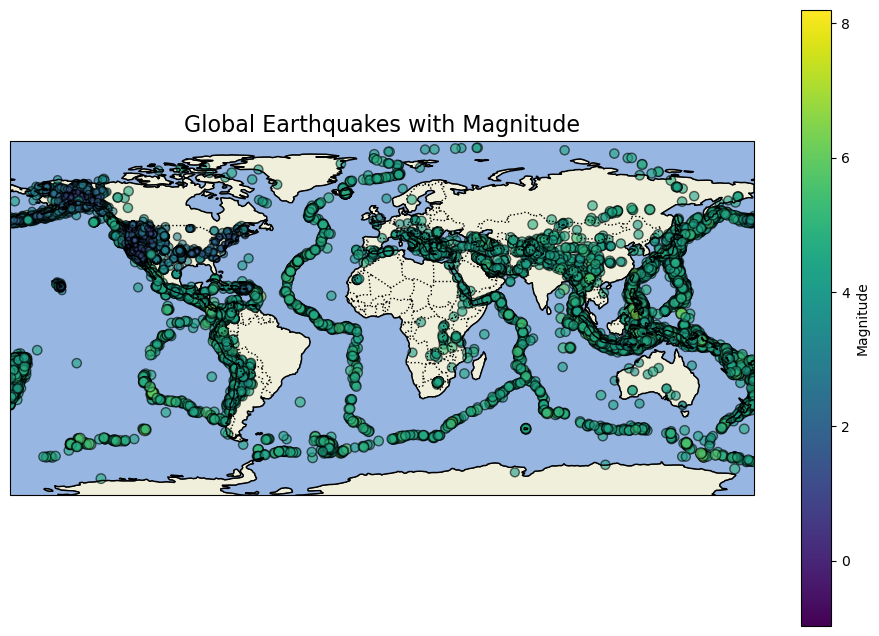

In [3]:
# 1
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 读取数据
data = pd.read_csv('usgs_earthquakes.csv')

# 提取经度、纬度和震级
longitudes = data['longitude']
latitudes = data['latitude']
magnitudes = data['mag']

# 创建一个颜色映射
norm = Normalize(vmin=magnitudes.min(), vmax=magnitudes.max())
cmap = plt.get_cmap('viridis')  

# 创建地图
plt.figure(figsize=(12, 8))
# 使用 PlateCarree 投影
ax = plt.axes(projection=ccrs.PlateCarree())

# 添加海岸线和国家边界
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 绘制地震点
# 使用 scatter 绘制地震点，大小根据震级调整，颜色根据震级映射
scatter = ax.scatter(longitudes, latitudes, s=magnitudes * 10,
                     c=magnitudes, cmap=cmap, norm=norm, 
                     alpha=0.6, edgecolors='k', transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Magnitude')
cbar.set_label('Magnitude')

# 添加标题
plt.title('Global Earthquakes with Magnitude', fontsize=16)

# 显示地图
plt.show()

In [5]:
# 这里我使用了Assignment 3的数据
import xarray as xr
import glob
# 定义文件路径模式
file_pattern = 'D:\\ESE5023\\output_file\\*.nc4'

# 获取所有匹配的文件路径
files = glob.glob(file_pattern)

# 读取并合并多个文件
CO2 = xr.open_mfdataset(files, combine='by_coords')

# 查看合并后的数据集
CO2

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

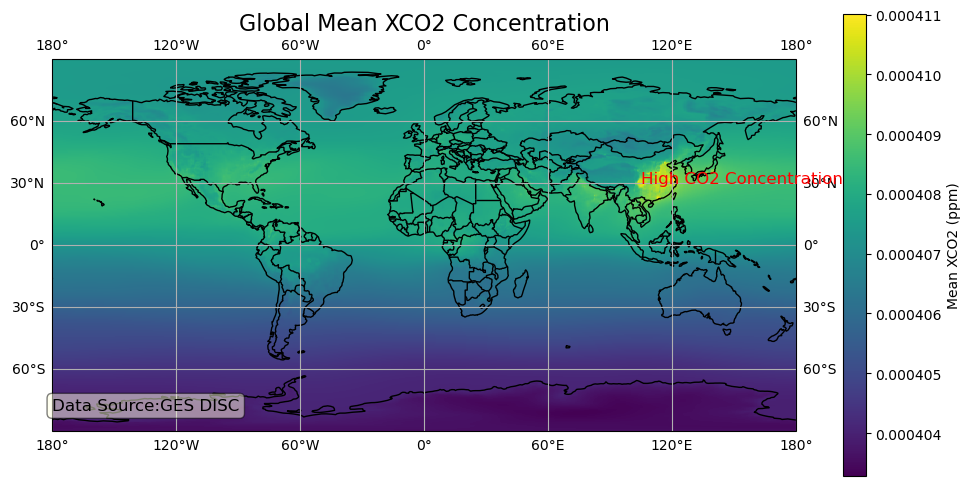

In [25]:
# 2.1
# 选择 XCO2 变量
xco2 = CO2['XCO2']  

# 计算 XCO2 的整体平均值
xco2_mean = xco2.mean(dim='time')

# 创建绘图使用 PlateCarree 投影
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制 XCO2 的平均浓度图
xco2_mean.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Mean XCO2 (ppm)'})

# 设置标题
ax.set_title('Global Mean XCO2 Concentration', fontsize=16)

# 添加坐标轴标签
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加网格线
ax.gridlines(draw_labels=True)

# 添加注释
high_concentration_lon = 105  # 经度
high_concentration_lat = 30    # 纬度
ax.annotate('High CO2 Concentration', 
            xy=(high_concentration_lon, high_concentration_lat), 
            xycoords='data',
            fontsize=12, 
            color='red')

# 文本框
textstr = 'Data Source:GES DISC'
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.5)
ax.text(-180, -80, textstr, fontsize=12, bbox=props)

# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# 显示图形
plt.show()

RuntimeError: Cannot handle non-rectangular coordinate systems.

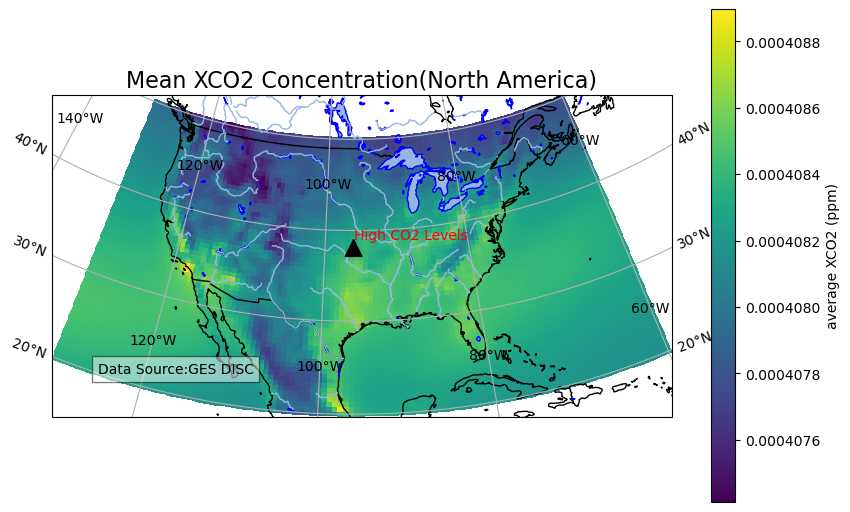

In [9]:
# 2.2
# 定义区域地图的范围 [西经, 东经, 南纬, 北纬]，这里我集中在北美区域
extent = [-130, -60, 20, 50]  

# 选择LambertConformal投影
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.LambertConformal()})

# 绘制指定区域的平均 XCO2
xco2_mean.sel(lon=slice(extent[0], extent[1]), lat=slice(extent[2], extent[3])).plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    cbar_kwargs={'label': 'average XCO2 (ppm)', 'shrink': 0.8}
)

# 设置标题
ax.set_title('Mean XCO2 Concentration(North America)', fontsize=16)

# 设置 x 轴和 y 轴标签
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加网格线
ax.gridlines(draw_labels=True)

# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS)

# 添加注释
ax.annotate('High CO2 Levels', xy=(-100, 40), xytext=(-110, 45),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, color='red')

# 将文本框放置在左下角，稍微向上移动以避免重叠
ax.text(-125, 20, 'Data Source:GES DISC', fontsize=10, 
        bbox=dict(facecolor='white', alpha=0.5), transform=ccrs.PlateCarree())
# 设置 x 轴和 y 轴刻度
ax.set_xticks(range(-130, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(range(20, 51, 5), crs=ccrs.PlateCarree())

# 显示图形
plt.show()